In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Import and preprocess the dataset

In [3]:
df = pd.read_csv(r"C:\Extras\Programs\My Projects\income simple linear regression\datasets\Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [9]:
df_cleaned = df.drop(columns=['Species'])
df_cleaned = df_cleaned.dropna()

x = df_cleaned.drop(columns=['Weight'])
y = df_cleaned['Weight']
x,y

(     Length1  Length2  Length3   Height   Width
 0       23.2     25.4     30.0  11.5200  4.0200
 1       24.0     26.3     31.2  12.4800  4.3056
 2       23.9     26.5     31.1  12.3778  4.6961
 3       26.3     29.0     33.5  12.7300  4.4555
 4       26.5     29.0     34.0  12.4440  5.1340
 ..       ...      ...      ...      ...     ...
 154     11.5     12.2     13.4   2.0904  1.3936
 155     11.7     12.4     13.5   2.4300  1.2690
 156     12.1     13.0     13.8   2.2770  1.2558
 157     13.2     14.3     15.2   2.8728  2.0672
 158     13.8     15.0     16.2   2.9322  1.8792
 
 [159 rows x 5 columns],
 0      242.0
 1      290.0
 2      340.0
 3      363.0
 4      430.0
        ...  
 154     12.2
 155     13.4
 156     12.2
 157     19.7
 158     19.9
 Name: Weight, Length: 159, dtype: float64)

## Split data into train-test sets

In [10]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(f"x_tr shape: {x_tr.shape}")
print(f"x_ts shape: {x_ts.shape}")
print(f"y_tr shape: {y_tr.shape}")
print(f"y_ts shape: {y_ts.shape}")

x_tr, x_ts, y_tr, y_ts

x_tr shape: (127, 5)
x_ts shape: (32, 5)
y_tr shape: (127,)
y_ts shape: (32,)


(     Length1  Length2  Length3   Height   Width
 75      15.0     16.2     17.2   4.5924  2.6316
 138     43.2     46.0     48.7   7.7920  4.8700
 2       23.9     26.5     31.1  12.3778  4.6961
 86      20.0     22.0     23.5   6.1100  3.4075
 45      20.5     22.5     25.3   7.0334  3.8203
 ..       ...      ...      ...      ...     ...
 71      24.0     26.0     29.0  11.3680  4.2340
 106     25.9     28.0     29.4   7.8204  4.2042
 14      29.4     32.0     37.2  14.9544  5.1708
 92      20.5     22.5     24.0   6.7920  3.6240
 102     25.2     27.3     28.7   8.3230  5.1373
 
 [127 rows x 5 columns],
      Length1  Length2  Length3   Height   Width
 78      16.8     18.7     19.4   5.1992  3.1234
 155     11.7     12.4     13.5   2.4300  1.2690
 128     30.0     32.3     34.8   5.5680  3.3756
 55      23.6     26.0     28.7   8.3804  4.2476
 94      21.0     23.0     24.5   5.2185  3.6260
 29      33.5     37.0     42.6  18.9570  6.6030
 147     10.1     10.6     11.6   1.7284  

## Fit a Linear Regression model

In [11]:
model = LinearRegression()
model.fit(x_tr, y_tr)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Match coefficients to feature names
coef_table = pd.DataFrame({
    'Feature': x_tr.columns,
    'Coefficient': model.coef_
})
print("\nCoefficient Table:\n", coef_table)

Intercept: -515.3056513384324
Coefficients: [ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294]

Coefficient Table:
    Feature  Coefficient
0  Length1    43.535265
1  Length2     7.821796
2  Length3   -25.256701
3   Height    23.228912
4    Width    27.066493


## Evaluate model using MAE, MSE, R²

In [12]:
y_pr = model.predict(x_ts)

mae = mean_absolute_error(y_ts, y_pr)
mse = mean_squared_error(y_ts, y_pr)
r2 = r2_score(y_ts, y_pr)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 103.91
Mean Squared Error (MSE): 16763.89
R² Score: 0.8821


## Plot regression line and interpret coefficients

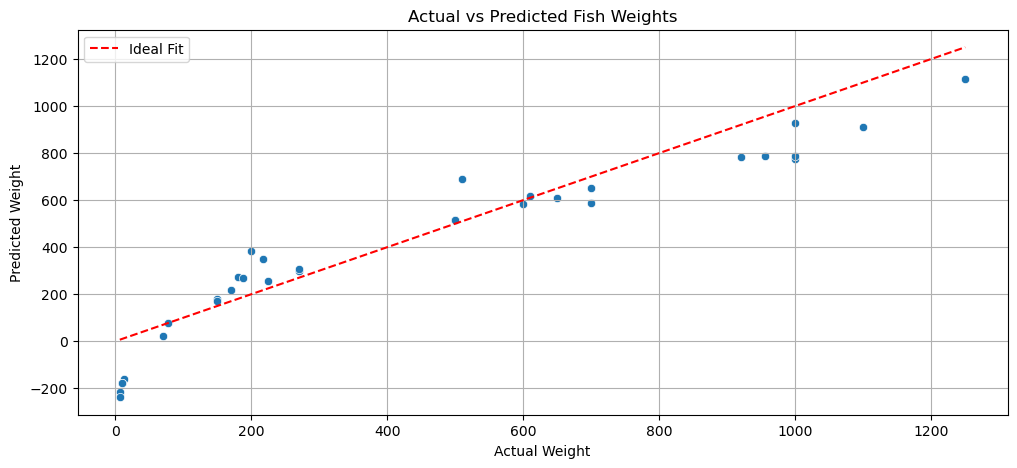

In [13]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_ts, y=y_pr)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Fish Weights")
plt.plot([y_ts.min(), y_ts.max()], [y_ts.min(), y_ts.max()], color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.grid(True)
plt.show()